In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sample_sub

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


<AxesSubplot:xlabel='label', ylabel='count'>

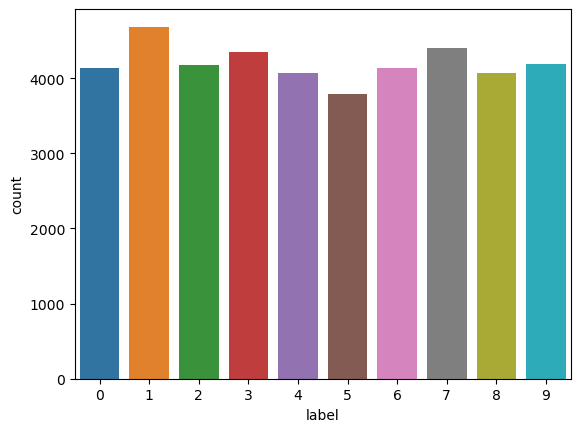

In [6]:
sns.countplot(data = train_data, x = "label")

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test_id = sample_sub.ImageId.copy()

In [9]:
train_data.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [10]:
x_train = train_data.drop(["label"], axis = 1)
y_train = train_data["label"]

In [11]:
x_test = test_data
y_test = sample_sub

In [12]:
missing_vals = x_train.isnull().sum()
print(missing_vals[missing_vals > 0])

Series([], dtype: int64)


In [13]:
missing_vals = x_test.isnull().sum()
print(missing_vals[missing_vals > 0])

Series([], dtype: int64)


In [14]:
x_test.shape

(28000, 784)

In [15]:
y_train = pd.get_dummies(y_train).values

In [16]:
from sklearn.model_selection import train_test_split

x, x_val, y, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

In [17]:
x.shape

(37800, 784)

In [18]:
y_val.shape

(4200, 10)

In [19]:
y.shape

(37800, 10)

In [20]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [21]:
x = np.array(x).reshape(x.shape[0], 28, 28, 1)


In [22]:
x.shape

(37800, 28, 28, 1)

In [23]:
train_images = x
train_images = train_images.astype('float32') / 255

In [24]:
x_test = np.array(x_test).reshape(x_test.shape[0], 28, 28, 1)

In [25]:
test_images = x_test
test_images = test_images.astype('float32') / 255

test_images.shape

(28000, 28, 28, 1)

In [26]:
x_val = np.array(x_val).reshape(x_val.shape[0], 28, 28, 1)

In [27]:
x_val = x_val.astype('float32') / 255

x_val.shape

(4200, 28, 28, 1)

In [28]:
y.shape

(37800, 10)

In [29]:
y_train.shape

(42000, 10)

In [30]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
# Use the training data to train the model
model.fit(train_images, y,
          validation_data = (x_val,y_val),
          batch_size=100,
          epochs=20,
          verbose=1)



Epoch 1/20
378/378 [==============================] - 23s 58ms/step - loss: 0.2495 - accuracy: 0.9241 - val_loss: 0.1068 - val_accuracy: 0.9662
Epoch 2/20
378/378 [==============================] - 21s 56ms/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0638 - val_accuracy: 0.9805
Epoch 3/20
378/378 [==============================] - 21s 56ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 4/20
378/378 [==============================] - 21s 57ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 5/20
378/378 [==============================] - 21s 56ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0384 - val_accuracy: 0.9881
Epoch 6/20
378/378 [==============================] - 21s 56ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0371 - val_accuracy: 0.9895
Epoch 7/20
378/378 [==============================] - 21s 57ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0366 - val_accuracy:

In [33]:
preds_test = model.predict(x_test)

875/875 [==============================] - 6s 7ms/step


In [34]:
preds_test = np.argmax(preds_test,axis = 1)

results = pd.Series(preds_test,name="Label")

In [35]:
output = pd.DataFrame({'ImageId': test_id,
                       'Label': preds_test})

output.to_csv('submission.csv', index=False)